In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df = df.iloc[:, 1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


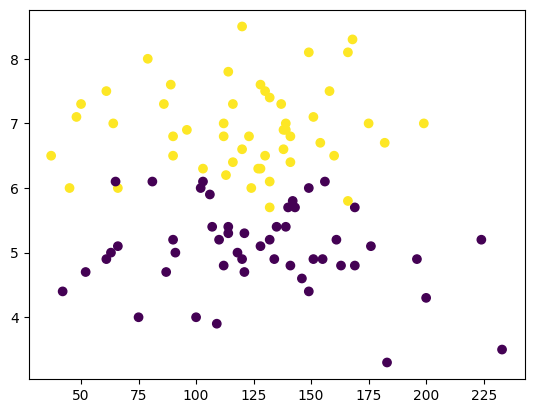

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['iq'], df['cgpa'], c=df['placement'])

In [7]:
X = df.drop('placement', axis=1)
y = df['placement']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 2.92484504e-01, -4.92785635e-01],
       [ 7.32678573e-01, -8.13988527e-01],
       [-1.02809770e+00, -2.70414401e-01],
       [ 1.17287264e+00,  3.47283470e-01],
       [ 2.83680622e-02, -1.92584469e+00],
       [-6.75942448e-01, -8.13988527e-01],
       [-7.63981262e-01,  1.31089215e+00],
       [-5.87903634e-01, -2.20998572e-01],
       [ 1.43698908e+00,  1.24912236e-01],
       [ 7.32678573e-01,  1.37266194e-03],
       [ 8.20717386e-01, -6.65741039e-01],
       [ 1.17287264e+00, -1.71582742e-01],
       [ 1.61306671e+00, -2.20998572e-01],
       [ 1.16406876e-01,  2.23743895e-01],
       [-1.11613652e+00, -8.88112272e-01],
       [-5.96707516e-02, -4.18661890e-01],
       [-6.75942448e-01,  9.40273426e-01],
       [ 1.87718315e+00,  6.43778448e-01],
       [-9.40058890e-01, -7.27510826e-02],
       [-5.87903634e-01, -4.80431677e-02],
       [-6.75942448e-01, -3.19830231e-01],
       [-8.52020076e-01, -7.89280613e-01],
       [-1.46829177e+00,  1.90388210e+00],
       [-1.

In [10]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.55660095,  0.37199138],
       [ 0.11640688, -1.03635976],
       [-1.38025296,  0.64377845],
       [ 2.22933841, -0.07275108],
       [ 0.38052332,  0.44611513],
       [-0.23574838,  0.49553096],
       [ 0.9087562 ,  1.28618423],
       [-0.67594245,  0.2237439 ],
       [-0.85202008, -1.48110223],
       [ 0.99679501,  0.69319428]])

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

<Axes: >

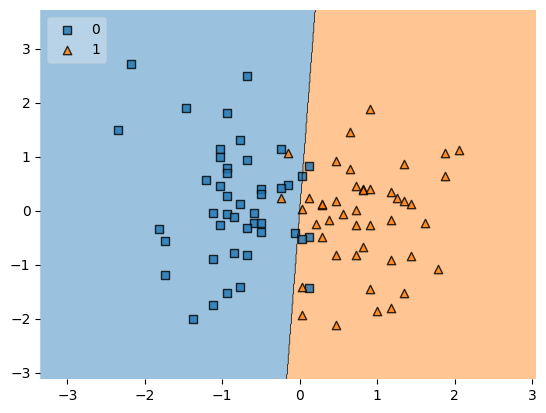

In [21]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [23]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))